In [13]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import numpy as np
import pandas as pd
from functools import reduce

In [24]:
df = pd.read_csv('fashion data.csv')

In [21]:
review_list = df['review text']

In [25]:
# aggregate the items in the review_list
reivew_words = reduce(lambda x,y:str(x)+' '+ str(y),review_list)

# 1) simple bag-of-words

In [104]:
tokens = nltk.word_tokenize(reivew_words)
tokens1 = [w.lower() for w in tokens if w.isalpha()]
freq1 = FreqDist(tokens1)
freq1_sorted = sorted(freq1.items(), key = lambda x:x[1], reverse = True)
freq1_sorted[0:30]

[('the', 6451),
 ('a', 4197),
 ('and', 3708),
 ('of', 3610),
 ('to', 2531),
 ('in', 2357),
 ('with', 1584),
 ('that', 1562),
 ('was', 1410),
 ('for', 1109),
 ('on', 1029),
 ('as', 931),
 ('it', 876),
 ('were', 697),
 ('her', 692),
 ('is', 684),
 ('but', 679),
 ('this', 662),
 ('his', 649),
 ('at', 610),
 ('from', 556),
 ('an', 539),
 ('collection', 489),
 ('by', 437),
 ('he', 423),
 ('be', 409),
 ('its', 406),
 ('or', 406),
 ('she', 394),
 ('their', 392)]

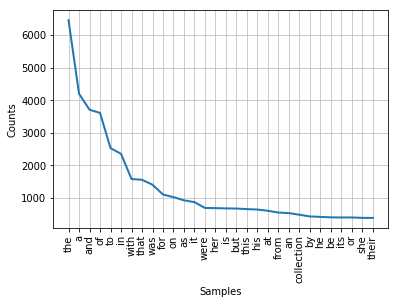

In [105]:
freq1.plot(30)

# 2) a bag-of-words approach with stemming and stop words removal

In [60]:
# remove stop words
mystopwords = stopwords.words('english')
words = [w.lower() for w in tokens if w.isalpha() if w.lower() not in mystopwords]

In [61]:
# do porter stemming
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words]

In [98]:
freq2 = FreqDist(stem1)
freq2_sorted = sorted(freq2.items(), key=lambda x:x[1], reverse = True)
freq2_sorted[0:30]

[('dress', 660),
 ('collect', 601),
 ('design', 499),
 ('look', 492),
 ('show', 431),
 ('one', 393),
 ('new', 364),
 ('like', 360),
 ('season', 293),
 ('print', 278),
 ('spring', 256),
 ('piec', 248),
 ('cloth', 243),
 ('way', 234),
 ('skirt', 230),
 ('fashion', 226),
 ('said', 222),
 ('also', 221),
 ('jacket', 203),
 ('made', 201),
 ('silk', 190),
 ('white', 186),
 ('black', 186),
 ('came', 181),
 ('time', 170),
 ('even', 167),
 ('work', 164),
 ('thing', 161),
 ('brand', 157),
 ('first', 153)]

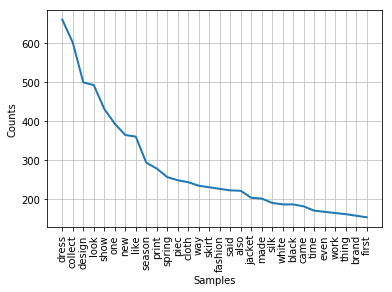

In [89]:
freq2.plot(30)

# 3) POS approach (NN, NNP, NNS, NNPS)

In [100]:
POS_tags = nltk.pos_tag(tokens)
list_all_none = [word for (word, tag) in POS_tags if tag == 'NN' or tag == 'NNP' or tag == 'NNS' or tag == 'NNPS']
tag_freq = nltk.FreqDist(list_all_none)
sorted_tag_freq = sorted(tag_freq.items(), key=lambda x:x[1], reverse = True)
sorted_tag_freq[0:30]

[('collection', 480),
 ('dresses', 302),
 ('dress', 270),
 ('show', 250),
 ('designer', 228),
 ('clothes', 223),
 ('season', 219),
 ('Spring', 209),
 ('pieces', 196),
 ('way', 191),
 ('silk', 168),
 ('fashion', 160),
 ('designers', 150),
 ('looks', 138),
 ('skirts', 126),
 ('pants', 125),
 ('runway', 123),
 ('time', 123),
 ('look', 117),
 ('brand', 110),
 ('prints', 109),
 ('New', 109),
 ('women', 104),
 ('lace', 102),
 ('jacket', 101),
 ('skirt', 101),
 ('point', 100),
 ('jackets', 100),
 ('collections', 96),
 ('today', 93)]

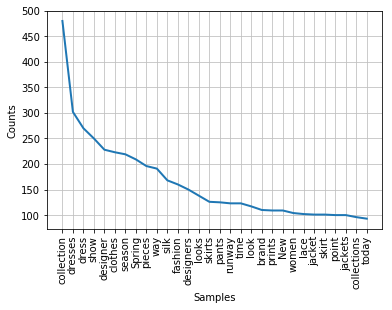

In [91]:
tag_freq.plot(30)

# 4) POS approach (NNP)

In [101]:
list_NNP = [word for (word, tag) in POS_tags if tag == 'NNP']
NNP_freq = nltk.FreqDist(list_NNP)
sorted_tag_freq = sorted(NNP_freq.items(), key=lambda x:x[1], reverse = True)
sorted_tag_freq[0:30]

[('New', 109),
 ('York', 88),
 ('Spring', 44),
 ('London', 43),
 ('Paris', 37),
 ('Fashion', 36),
 ('West', 25),
 ('City', 22),
 ('Wang', 20),
 ('Week', 19),
 ('Fall', 19),
 ('Im', 19),
 ('Lee', 19),
 ('T-shirt', 18),
 ('Milan', 18),
 ('Saint', 17),
 ('Instagram', 17),
 ('A', 16),
 ('Japan', 16),
 ('Johnson', 16),
 ('East', 15),
 ('Resort', 15),
 ('Versace', 15),
 ('A-line', 14),
 ('Art', 14),
 ('David', 13),
 ('DKNY', 13),
 ('Anderson', 13),
 ('Which', 12),
 ('Chanel', 12)]

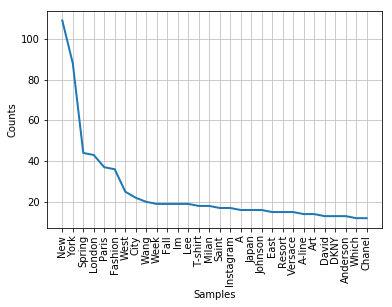

In [93]:
NNP_freq.plot(30)